<a href="https://colab.research.google.com/github/thuvamathi/Rahul-Thuvarakan/blob/main/Rahul%2BThuvarakan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

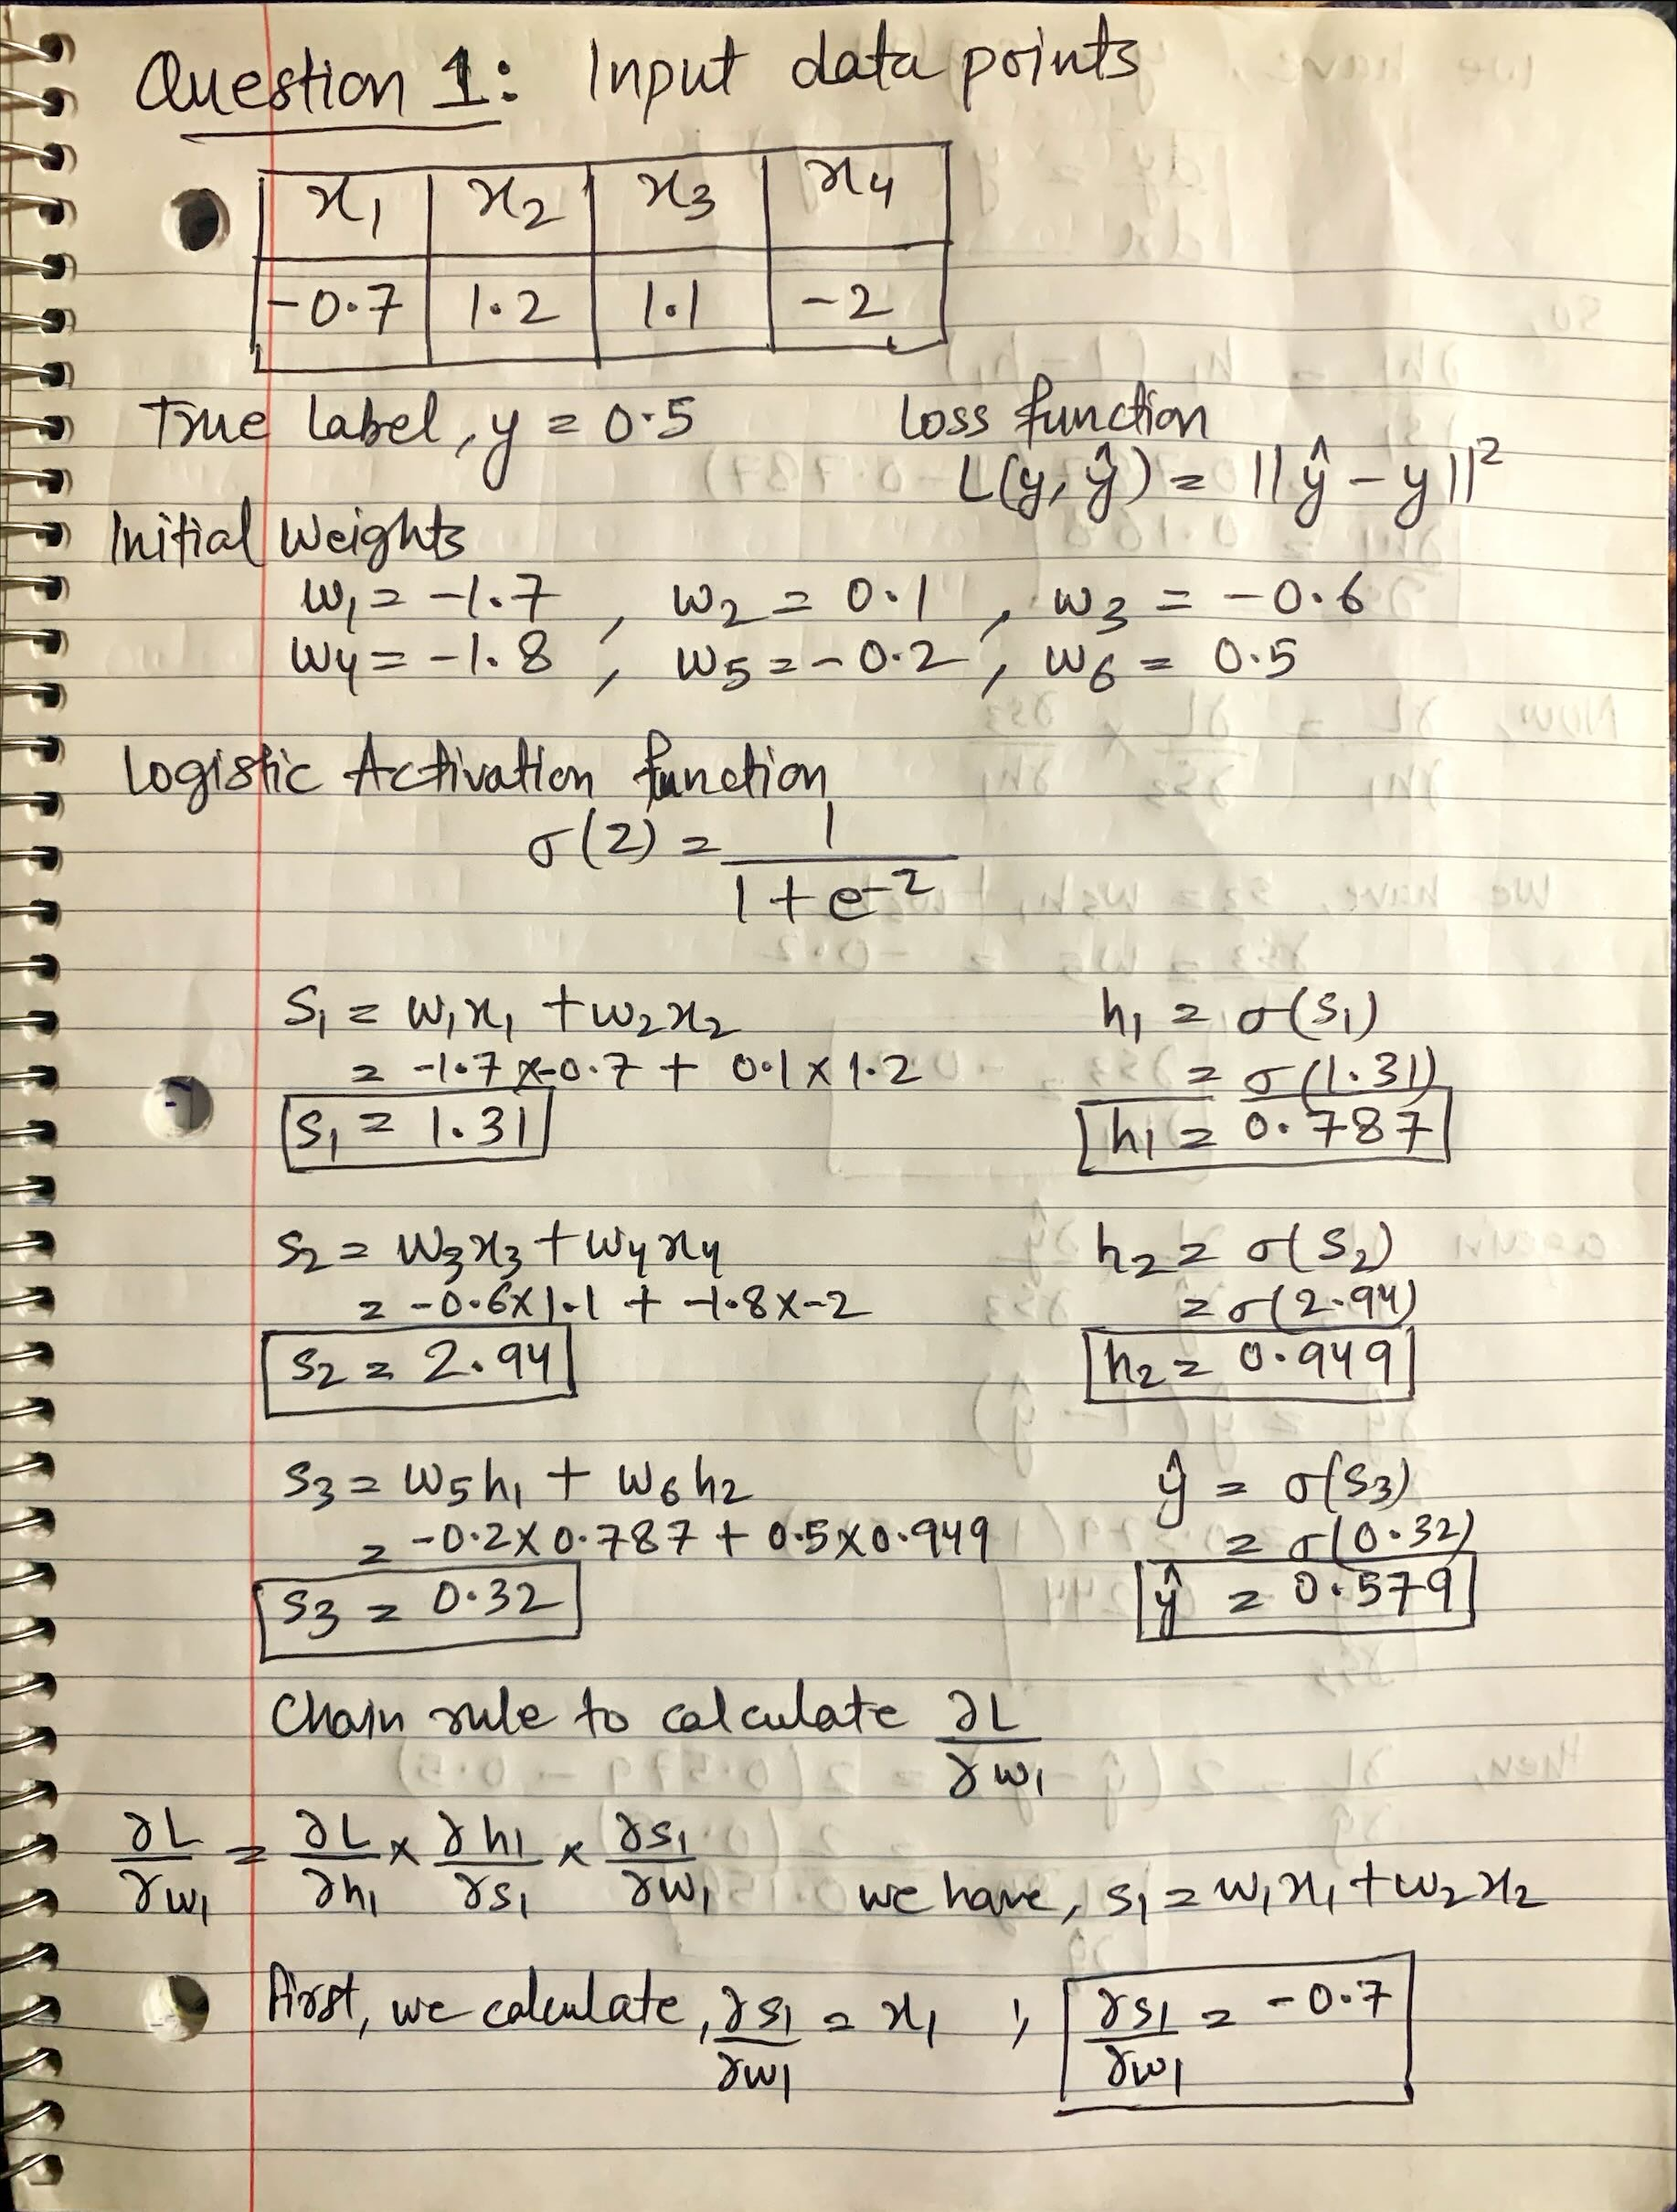

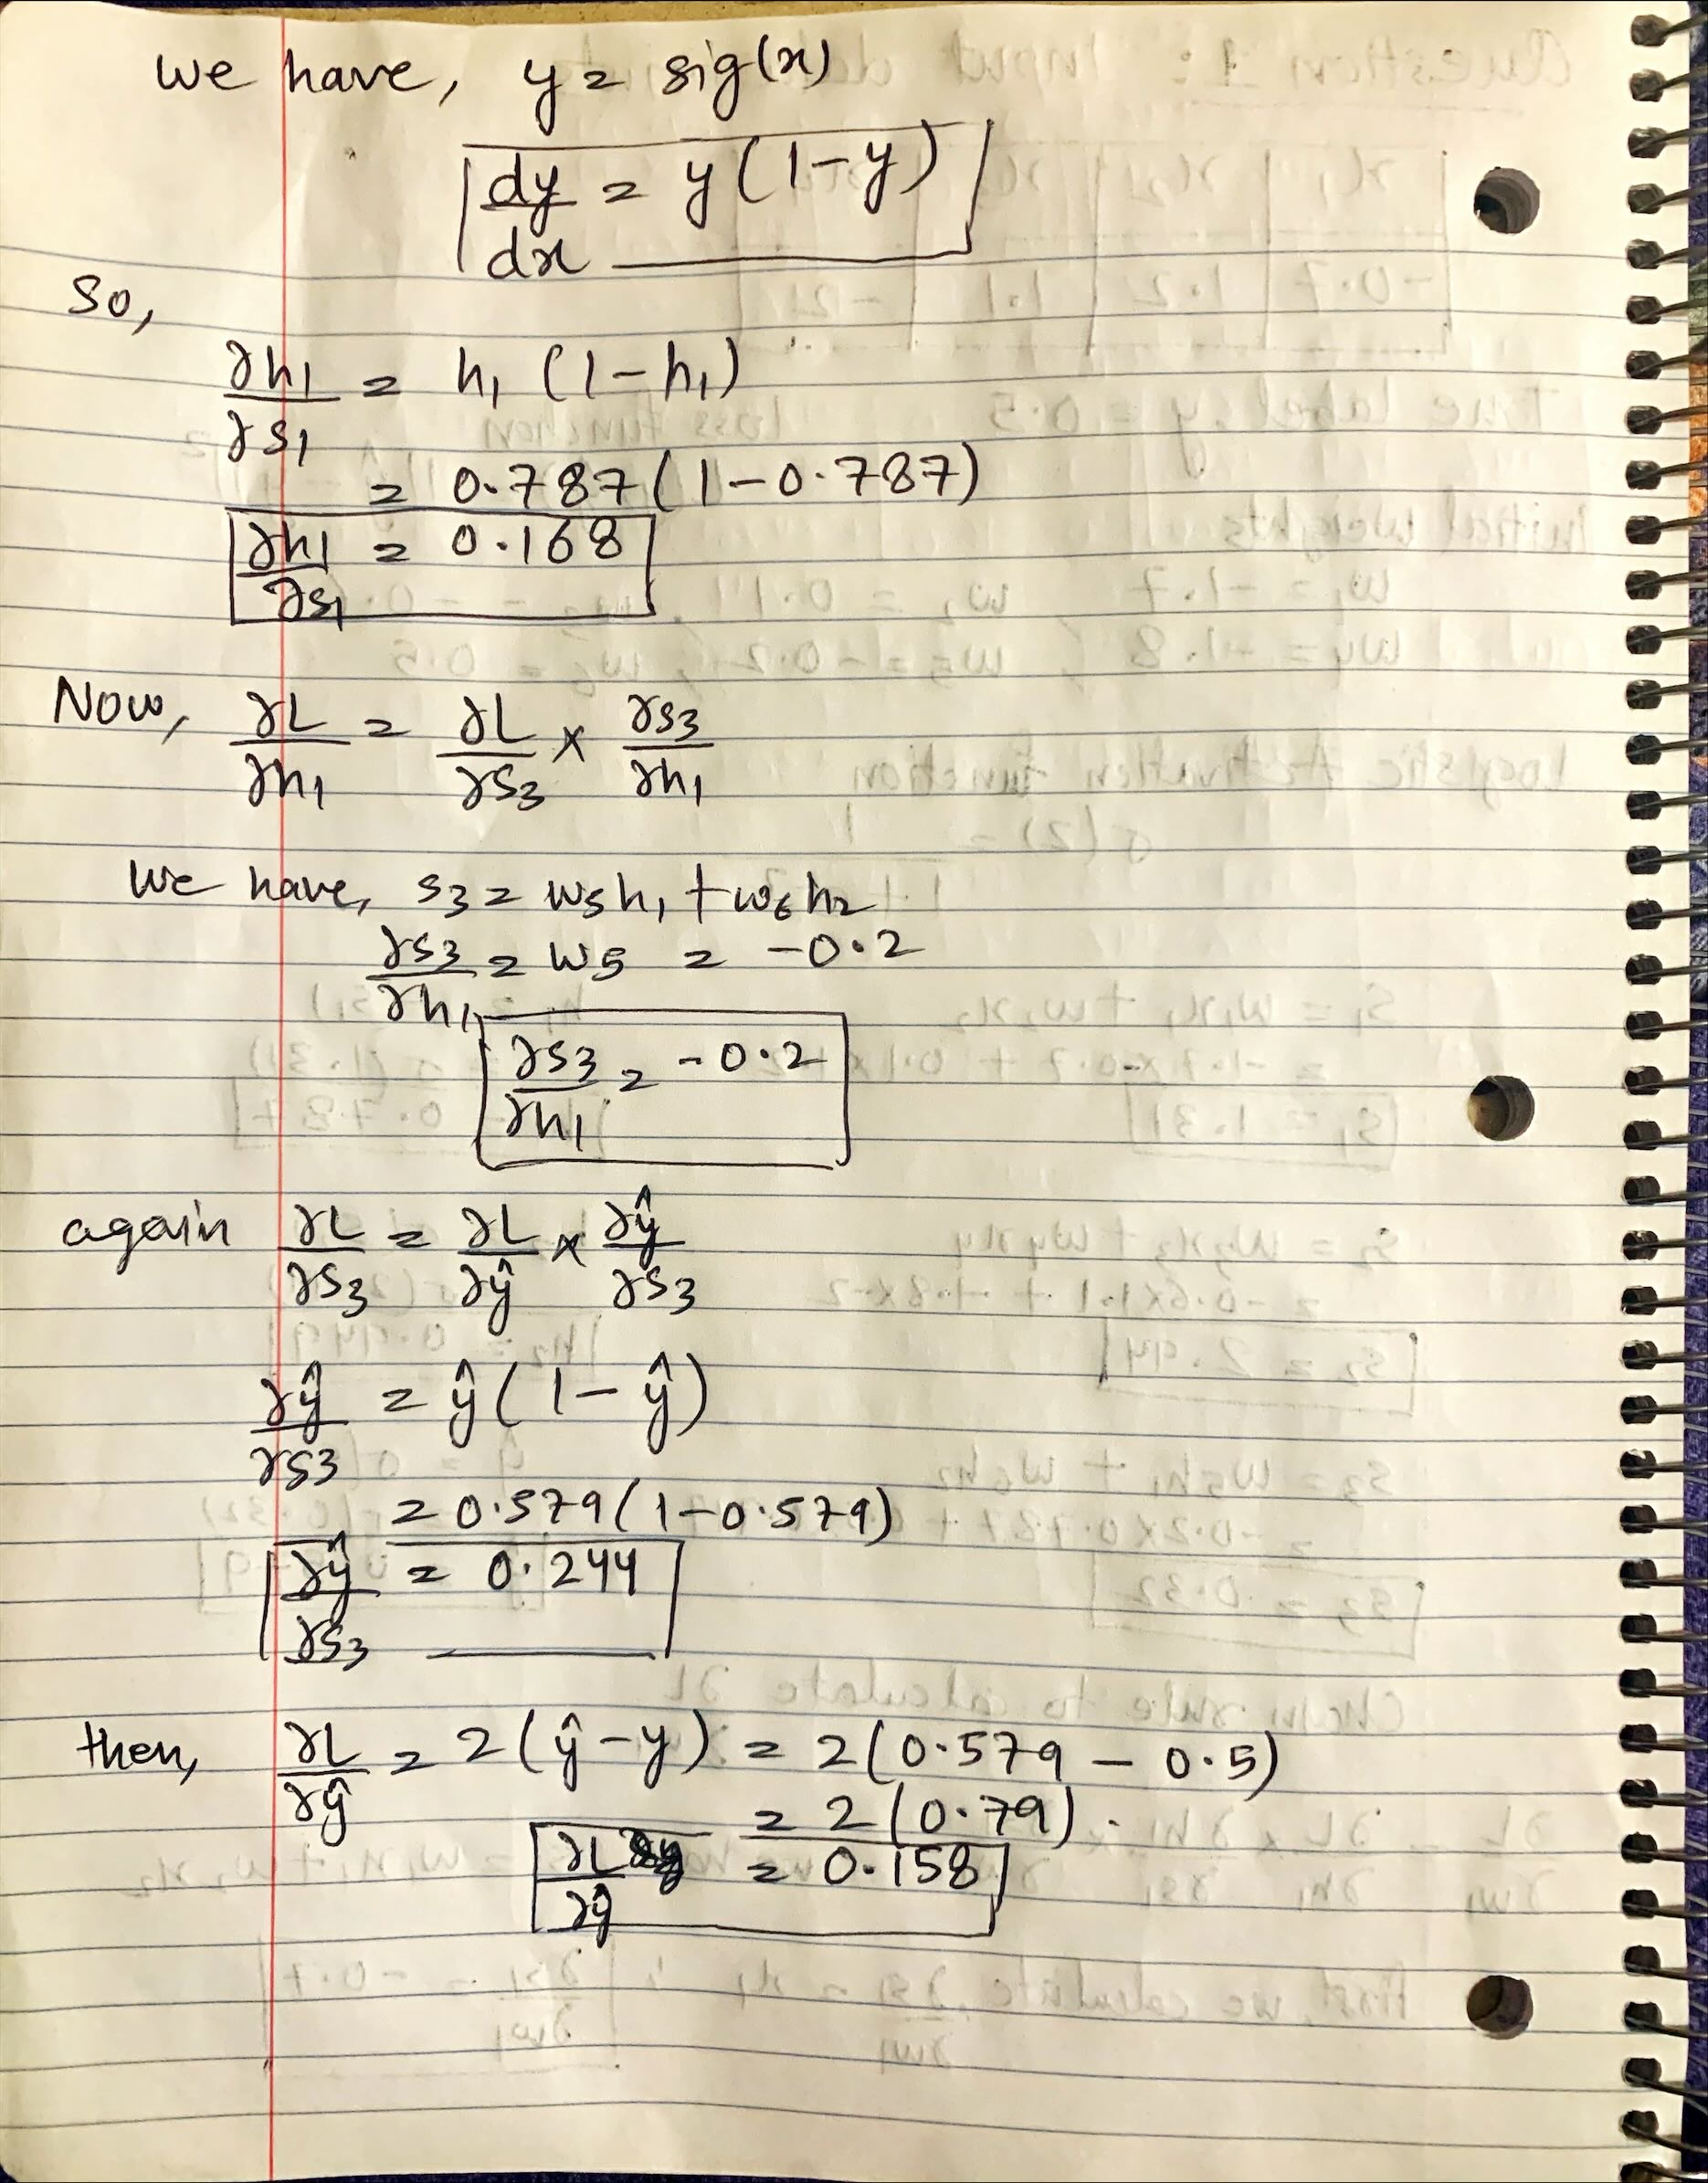

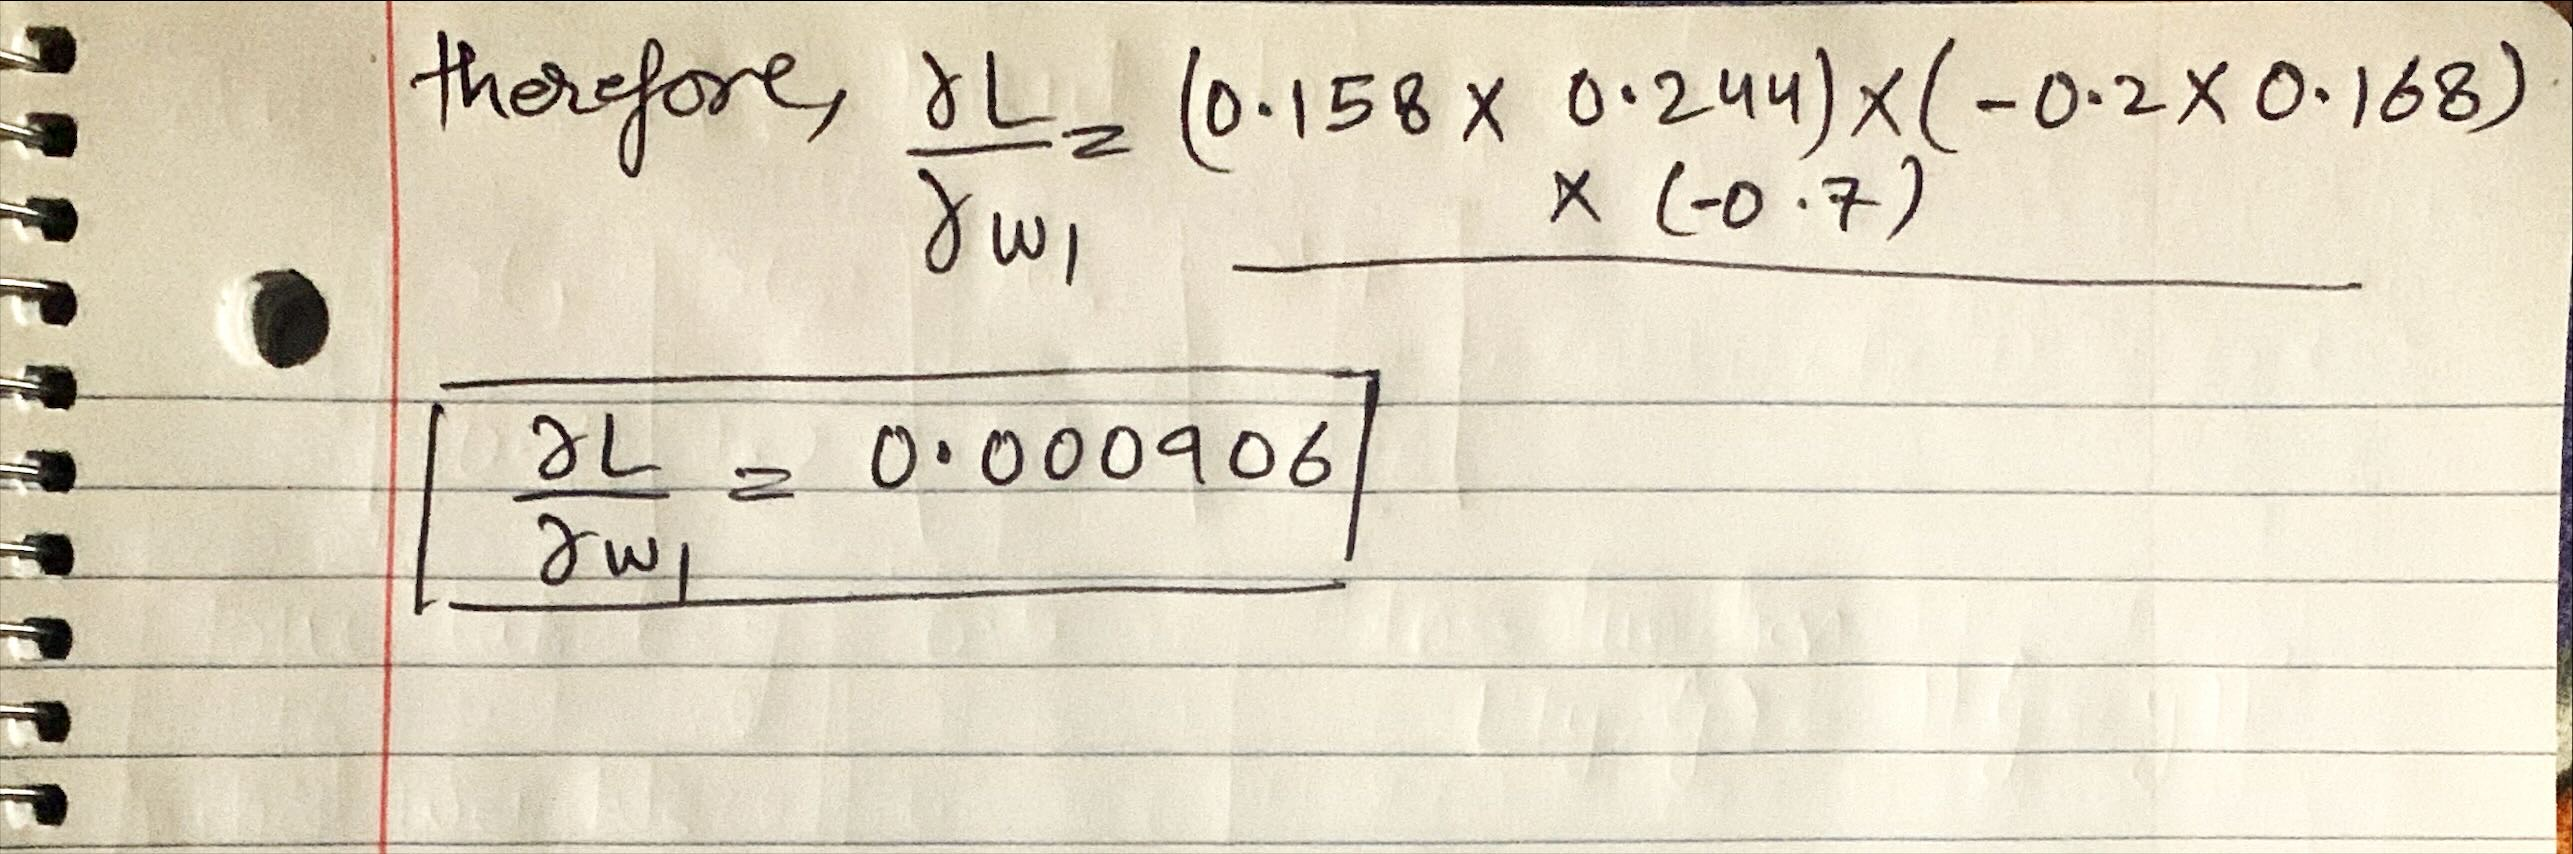

# Question 2

# a.

In [ ]:
import pandas as pd

train_df = pd.read_csv("trainData.txt")
test_df  = pd.read_csv("testData.txt")


In [ ]:
print(f"Number of Training samples: {train_df.shape}")

Number of Training samples: (8143, 7)


In [ ]:
print(f"Number of Test samples: {test_df.shape}")

Number of Test samples: (9752, 7)


# b.

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [ ]:
features = ["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"]
target = "Occupancy"

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train = train_df[features].values
y_train = train_df[target].values

X_test  = test_df[features].values
y_test  = test_df[target].values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
hidden_units = [2, 4, 6, 8]
test_acc = []

for h in hidden_units:

    #create a model
    model = tf.keras.Sequential([
            Dense(h, activation='relu', input_shape=(5,)),
            Dense(1, activation='sigmoid')
    ])

    #compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #train the model
    fittedModel = model.fit(X_train_scaled, y_train, epochs=40, validation_split=0.3, verbose=0)

    #evaluate
    loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
    test_acc.append(acc)
    print(f"Test Accuracy for {h} Hidden Units: {acc:.4f}")


Test Accuracy for 2 Hidden Units: 0.8238
Test Accuracy for 4 Hidden Units: 0.8943
Test Accuracy for 6 Hidden Units: 0.8746
Test Accuracy for 8 Hidden Units: 0.8495


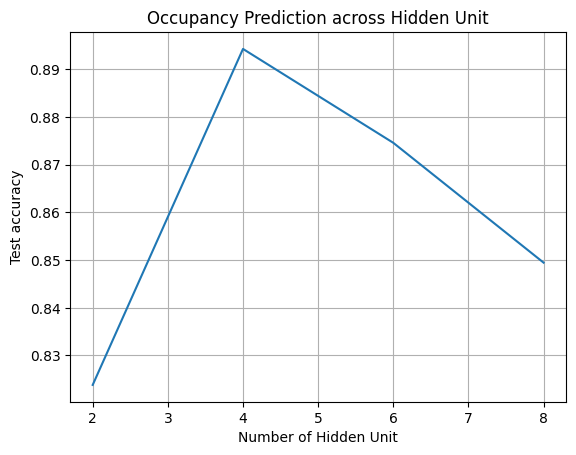

In [ ]:
#plot the graph
plt.figure()
plt.plot(hidden_units, test_acc)
plt.xlabel("Number of Hidden Unit")
plt.ylabel("Test accuracy")
plt.title("Occupancy Prediction across Hidden Unit")
plt.grid(True)
plt.show()

# c.

In [ ]:
architectures = [(4,2), (8,4), (16,8)]
arch_eval = []

for h1, h2 in architectures:

    #create a model
    model = tf.keras.Sequential([
        Dense(h1, activation='relu', input_shape=(5,)),
        Dense(h2, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    #compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

    #train the model
    fittedModel = model.fit(X_train_scaled, y_train, epochs=20, validation_split=0.3,verbose=0)

    #evaluate
    loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
    arch_eval.append((h1, h2, acc))
    print(f"Test accuracy for architecture [Input=5, Hidden1={h1}, Hidden2={h2}, Output=1]: {acc:.4f}\n")


Test accuracy for architecture [Input=5, Hidden1=4, Hidden2=2, Output=1]: 0.9131

Test accuracy for architecture [Input=5, Hidden1=8, Hidden2=4, Output=1]: 0.8361

Test accuracy for architecture [Input=5, Hidden1=16, Hidden2=8, Output=1]: 0.8772



#d.
For single hidden layer neural network, accuracy improves from 2 to 4 hidden units, reaching the highest at 89.43%. But when the hidden units increase to 6 and 8, accuracy drops to 84.95%. So, 4 hidden units give the best overall accuracy for this model.

For two hidden layer architecture, smallest architecture (4,2) reached 91.31% accuracy, which means this simpler model generalizes better than larger architecture such as (8,4) and (16,8) which gave the accuracies 83.61% and 87.72%. So, the (4,2) architecture performs best and provides the most effective model.

# Question 3

The authors applied a Recurrent Neural Network (RNN) using the Long Short Term Memory (LSTM) architecture to predict stock market opening prices for two assets GOOGL and NKE. They selected LSTMs because traditional RNNs cannot store long term patterns, while LSTMs use memory cells and gates (forget, input, output) to retain important information from past sequences. The dataset consisted of historical daily opening prices downloaded from Yahoo Finance, and they split it into 80% training and 20% testing.

Their model used four stacked LSTM layers with dropout after each layer to reduce overfitting, followed by a dense layer that produces a single predicted price value. Training was performed with different numbers of epochs (12, 25, 50, 100) to compare performance. They evaluated the model using Mean Squared Error, showing that more epochs improved prediction accuracy.

The results showed that the LSTM model was able to follow real stock price trends quite well, although its accuracy dropped when the price pattern changed too much. Overall, the authors successfully used LSTM based RNNs to learn from past sequence data and make reasonable predictions of future stock values.

# References:

1. https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3 (Question 2)